In [1]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
import torch.utils.data as Data

In [2]:
X= np.load('Dataset/data_test.npy')
print(X.shape)

(600000, 3)


In [8]:
standarder = StandardScaler()
standarder.fit(X)
X = standarder.transform(X)
X = torch.from_numpy(X).float()

In [9]:
class softmaxNet(nn.Module):
    def __init__(self):
        super(softmaxNet, self).__init__()
        self.layer1 = nn.Sequential(nn.Linear(3,200) , nn.ReLU(inplace = True), nn.Dropout())
        self.layer2 = nn.Sequential(nn.Linear(200,150) , nn.ReLU(inplace = True), nn.Dropout())
        self.layer3 = nn.Sequential(nn.Linear(150,100) , nn.ReLU(inplace = True), nn.Dropout())
        self.layer4 = nn.Sequential(nn.Linear(100,50) , nn.ReLU(inplace = True), nn.Dropout())
        self.layer5 = nn.Sequential(nn.Linear(50,10) , nn.ReLU(inplace = True), nn.Dropout(0.2))
        self.layer6 = nn.Sequential(nn.Linear(10,1), nn.Sigmoid())
        
    
    def forward(self,x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.layer6(x)
        
        return x

In [10]:
net = torch.load('model/softmaxNet.pkl')

In [11]:
Y_predict = net(X)

In [12]:
Y_predict

tensor([[8.7888e-01],
        [1.7154e-26],
        [1.2761e-01],
        ...,
        [1.0000e+00],
        [1.0000e+00],
        [1.0000e+00]], grad_fn=<SigmoidBackward>)

In [15]:
Y_predict[Y_predict >= 0.5] = 1
Y_predict[Y_predict < 0.5] = 0

In [18]:
Y_predict = Y_predict.detach().numpy()

In [31]:
Y_predict1 = Y_predict[0:300000,:]

In [32]:
Y_predict1.shape

(300000, 1)

In [33]:
Y_predict2 = Y_predict[300000:600000, :]
Y_predict2.shape

(300000, 1)

In [35]:
Y_predict1 = Y_predict1.reshape(500,600)
Y_predict1

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [36]:
import matplotlib.pyplot as plt

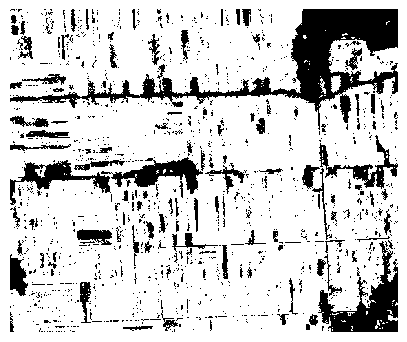

In [66]:
plt.figure(figsize=(5,6), dpi= 100)
plt.imshow(Y_predict1, cmap = 'gray')
plt.axis('off')
plt.savefig('figures/DL/Test1_reference.png',bbox_inches='tight', pad_inches = 0, dpi = 100)
plt.show()

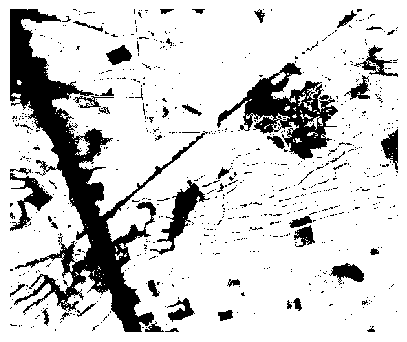

In [65]:
Y_predict2 = Y_predict2.reshape(500,600)
plt.figure(figsize=(5,6), dpi= 100)
plt.imshow(Y_predict2, cmap = 'gray')
plt.axis('off')
plt.savefig('figures/DL/Test2_reference.png',bbox_inches='tight', pad_inches = 0, dpi = 100)
plt.show()

In [67]:
agri_rate_1 = np.sum(Y_predict1) / (500 * 600)
print('Argiculture rate of Test1'+ ' is: ' + str(agri_rate_1))

Argiculture rate of Test1 is: 0.78989


In [68]:
agri_rate_2 = np.sum(Y_predict2) / (500 * 600)
print('Argiculture rate of Test2'+ ' is: ' + str(agri_rate_2))

Argiculture rate of Test2 is: 0.79874


In [69]:
from skimage.io import imread, imsave, imshow

In [86]:
Y_predict1 = Y_predict1.astype(np.int)
Y_predict2 = Y_predict2.astype(np.int)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [87]:
imsave('figures/DL/Test1_reference.tif', Y_predict1)
imsave('figures/DL/Test2_reference.tif', Y_predict2)

D:\Anaconda3\lib\site-packages\skimage\io\_io.py:141: UserWarning: figures/DL/Test1_reference.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
D:\Anaconda3\lib\site-packages\skimage\io\_io.py:141: UserWarning: figures/DL/Test2_reference.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


In [88]:
Y_predict1

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [90]:
fig = imread('figures/DL/Test1_reference.tif')
fig

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)